# Coffee Bean Classification

### Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
from glob import glob 
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")


## Data

### Loading dataset and checking classes

In [9]:
data = pd.read_csv('data\Coffee Bean.csv')
data.head()

,class index,filepaths,labels,data set
0,0,train/Dark/dark (1).png,Dark,train
1,0,train/Dark/dark (10).png,Dark,train
2,0,train/Dark/dark (100).png,Dark,train
3,0,train/Dark/dark (101).png,Dark,train
4,0,train/Dark/dark (102).png,Dark,train


In [10]:
classes = sorted(os.listdir('data/train/'))
print(classes)

photos_per_class = [len(glob('data/train/' + name + '/*.png')) for name in classes]
photos_per_class

['Dark', 'Green', 'Light', 'Medium']


[300, 300, 300, 300]

### Loading images

In [26]:
train_data_generator = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True, 
        width_shift_range = 0.2, 
        height_shift_range = 0.2,
        shear_range = 0.2, 
        zoom_range = 0.2, 
        validation_split=0.3)

test_data_generator = ImageDataGenerator(rescale=1./255)

train_data = train_data_generator.flow_from_directory('data/train/', target_size=(224, 224), shuffle=True, 
                                                       subset='training', class_mode='categorical')
validation = train_data_generator.flow_from_directory('data/train/', target_size=(224, 224), shuffle=True, 
                                                       subset='validation', class_mode='categorical')
test_data = train_data_generator.flow_from_directory('data/test/', target_size=(224, 224), shuffle=True, 
                                                       class_mode='categorical')

Found 840 images belonging to 4 classes.
Found 360 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


### Images from each class in train and test set

In [27]:
def show_image(target, bean_class):
    path = target + bean_class
    image = random.sample(os.listdir(path), 1)
    img = mpimg.imread(path + '/' + image[0])
    plt.imshow(img)
    plt.title(bean_class)
    plt.axis('off')

    return img

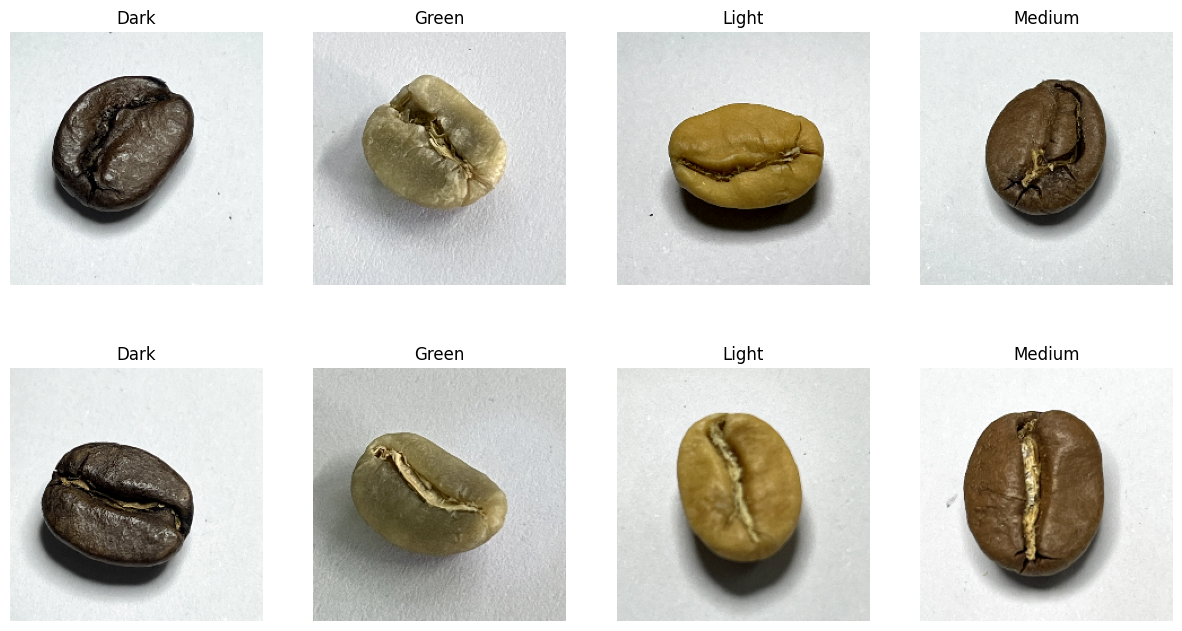

In [28]:
plt.figure(figsize = (15,8))
plt.subplot(2,4,1)
dark_bean_train = show_image('data/train/', 'Dark')
plt.subplot(2,4,2)
green_bean_train = show_image('data/train/', 'Green')
plt.subplot(2,4,3)
light_bean_train = show_image('data/train/', 'Light')
plt.subplot(2,4,4)
medium_bean_train = show_image('data/train/', 'Medium')
plt.subplot(2,4,5)
dark_bean_test = show_image('data/test/', 'Dark')
plt.subplot(2,4,6)
green_bean_test = show_image('data/test/', 'Green')
plt.subplot(2,4,7)
light_bean_test = show_image('data/test/', 'Light')
plt.subplot(2,4,8)
medium_bean_test = show_image('data/test/', 'Medium')

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (224,224,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 32)      

In [31]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [32]:
model.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=test_data.samples // 32)

Epoch 1/20
27/27 [==============================] - 60s 2s/step - loss: 1.6342 - accuracy: 0.2881 - val_loss: 1.2828 - val_accuracy: 0.2630
Epoch 2/20
27/27 [==============================] - 55s 2s/step - loss: 1.2838 - accuracy: 0.4333 - val_loss: 0.9142 - val_accuracy: 0.5547
Epoch 3/20
27/27 [==============================] - 67s 2s/step - loss: 0.9482 - accuracy: 0.5476 - val_loss: 0.5892 - val_accuracy: 0.8646
Epoch 4/20
27/27 [==============================] - 56s 2s/step - loss: 0.9270 - accuracy: 0.7440 - val_loss: 0.5168 - val_accuracy: 0.8125
Epoch 5/20
27/27 [==============================] - 46s 2s/step - loss: 0.5097 - accuracy: 0.8179 - val_loss: 0.5406 - val_accuracy: 0.7422
Epoch 6/20
27/27 [==============================] - 45s 2s/step - loss: 0.5203 - accuracy: 0.7726 - val_loss: 0.2546 - val_accuracy: 0.9271
Epoch 7/20
27/27 [==============================] - 46s 2s/step - loss: 0.6339 - accuracy: 0.8262 - val_loss: 0.2797 - val_accuracy: 0.9141
Epoch 8/20
27/27 [==

In [33]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (224,224,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [34]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [35]:
model.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=int(0.25 * len(test_data)))

Epoch 1/20
27/27 [==============================] - 44s 2s/step - loss: 1.4234 - accuracy: 0.2881 - val_loss: 1.3858 - val_accuracy: 0.2083
Epoch 2/20
27/27 [==============================] - 39s 1s/step - loss: 1.2624 - accuracy: 0.4155 - val_loss: 1.2225 - val_accuracy: 0.4583
Epoch 3/20
27/27 [==============================] - 39s 1s/step - loss: 0.9292 - accuracy: 0.6310 - val_loss: 1.1779 - val_accuracy: 0.4583
Epoch 4/20
27/27 [==============================] - 39s 1s/step - loss: 0.6957 - accuracy: 0.7369 - val_loss: 0.8887 - val_accuracy: 0.5417
Epoch 5/20
27/27 [==============================] - 39s 1s/step - loss: 0.4746 - accuracy: 0.8298 - val_loss: 0.2422 - val_accuracy: 0.9167
Epoch 6/20
27/27 [==============================] - 39s 1s/step - loss: 0.4671 - accuracy: 0.8560 - val_loss: 0.3574 - val_accuracy: 0.8542
Epoch 7/20
27/27 [==============================] - 39s 1s/step - loss: 0.3788 - accuracy: 0.8452 - val_loss: 0.1410 - val_accuracy: 0.9792
Epoch 8/20
27/27 [==